In [1]:
# Visualize some counter intuitive properties in high dimensions

# 1 - distances between images can't always be seen?

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib as mpl
# set this 'backend' when using jupyter; do this before importing pyplot
mpl.use('nbagg')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
from scipy import stats

import sys
sys.path.append('/home/felix/Research/Adversarial Research/FGN---Research/')
import Finite_Gaussian_Network_lib as fgnl
import Finite_Gaussian_Network_lib.fgn_helper_lib as fgnh

In [5]:
# load MNIST data
batch_sizefor_train = 50000
batch_size_for_val = 10000
(mnist_train_loader, mnist_val_loader, mnist_test_loader) = fgnh.mnist_dataloaders(batch_size=batch_sizefor_train,
                                                                 
                                                                                   batch_size_for_val=batch_size_for_val)

In [6]:
# show examples
x1 = mnist_train_loader.dataset.tensors[0][0]

<IPython.core.display.Javascript object>


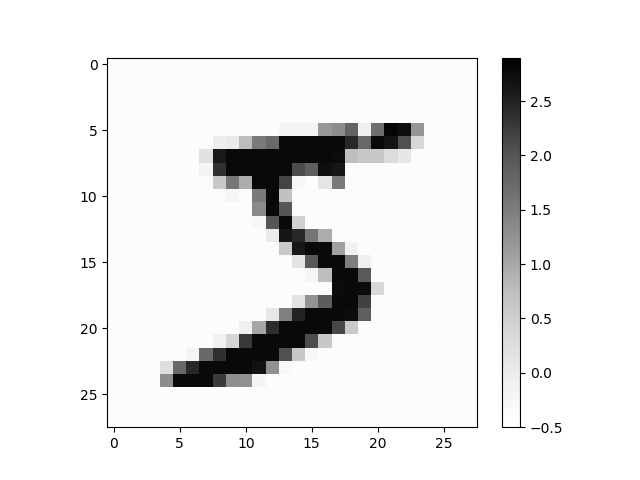

In [34]:
plt.imshow(x1, vmax=2.9, vmin=-0.5, cmap=plt.cm.get_cmap('Greys'))
plt.colorbar()
plt.show()

In [8]:
white_noise_dataloader = fgnh.mnist_random_dataloader(num_samples=1, batch_size=1)

<IPython.core.display.Javascript object>


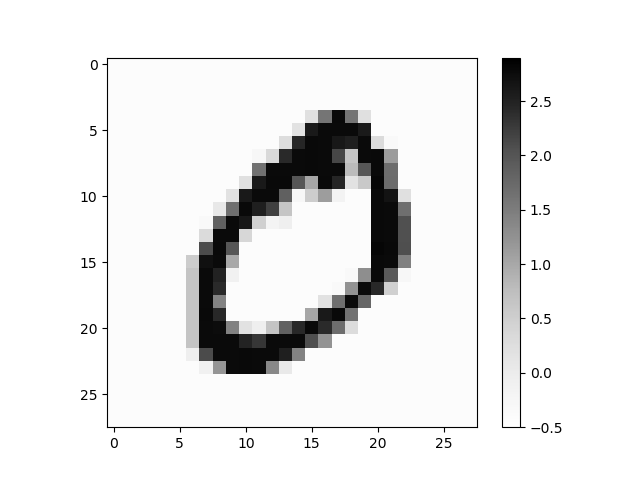

In [9]:
# show examples
x2 = mnist_train_loader.dataset.tensors[0][1]
plt.imshow(x2, vmax=2.9, vmin=-0.5, cmap=plt.cm.get_cmap('Greys'))
plt.colorbar()
plt.show()

In [10]:
#  euclidean distance between the two
d = np.linalg.norm(x1.numpy().flatten()-x2.numpy().flatten(), ord=2)
print(d)

30.34482


In [11]:
#  divide d into 28*28 pixels
# per pixel d
ppd = d/np.sqrt(28*28)
print(ppd)

1.0837435722351074


In [12]:
# define the new image that will be as far from x1 as x2 is far from x1
middle = (np.max(x1.numpy())+np.min(x1.numpy()) )/2
x3 = np.array([min(x+ppd, np.max(x1.numpy()))
               if x<middle
               else
               max(x-ppd, np.min(x1.numpy()))
               for x in x1.numpy().flatten()])
x3 = np.reshape(x3, x1.shape)

In [13]:
print(np.max(x1.numpy()))
print(np.min(x1.numpy()))
print(np.max(x2.numpy()))
print(np.min(x2.numpy()))
print(np.max(x3))
print(np.min(x3))

2.8170278
-0.42451692
2.8170278
-0.42451692
2.2736430168151855
0.14429187774658203


<IPython.core.display.Javascript object>


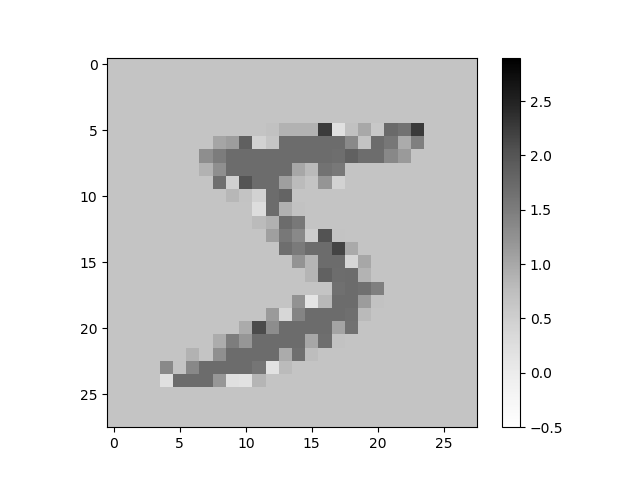

In [14]:
# show an example
plt.imshow(x3, vmax=2.9, vmin=-0.5, cmap=plt.cm.get_cmap('Greys'))
plt.colorbar()
plt.show()

In [15]:
np.linalg.norm(x1.numpy().flatten()-x3.flatten(), ord=2)

30.344820022583008

In [16]:
x4 = white_noise_dataloader.dataset.tensors[0][0]

In [17]:
np.linalg.norm(x1.numpy().flatten()-x4.numpy().flatten(), ord=2)

49.83541

In [18]:
x4 = x4*0.27

In [19]:
np.linalg.norm(x1.numpy().flatten()-x4.numpy().flatten(), ord=2)

30.272778

<IPython.core.display.Javascript object>


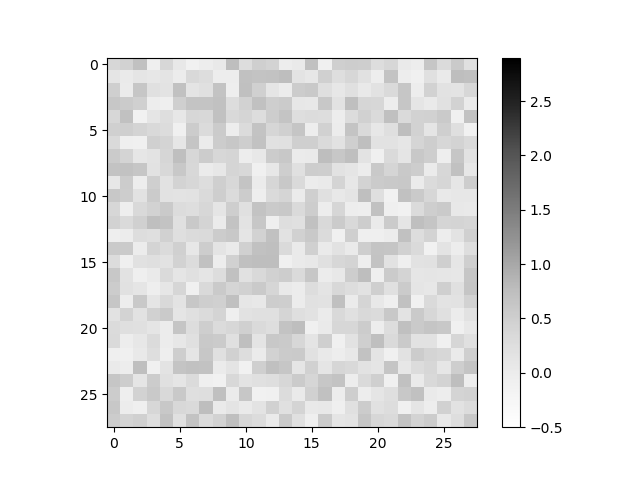

In [20]:
# show an example
plt.imshow(x4, vmax=2.9, vmin=-0.5, cmap=plt.cm.get_cmap('Greys'))
plt.colorbar()
plt.show()

In [37]:
x5 =  x1.numpy().flatten()
cur_d = np.linalg.norm(x1.numpy().flatten()-x5, ord=2)
# print(cur_d)
while cur_d<d:
    # pick random pixel and add noise
    i = np.random.choice(range(len(x5)))
#     print(i)
    x5[i] = min(max(np.min(x1.numpy()),x5[i]+ppd/100 ), np.max(x1.numpy()))
    cur_d = np.linalg.norm(x1.numpy().flatten()-x5, ord=2)
#     print(cur_d)

x5 = np.reshape(x5, x1.shape)

<IPython.core.display.Javascript object>


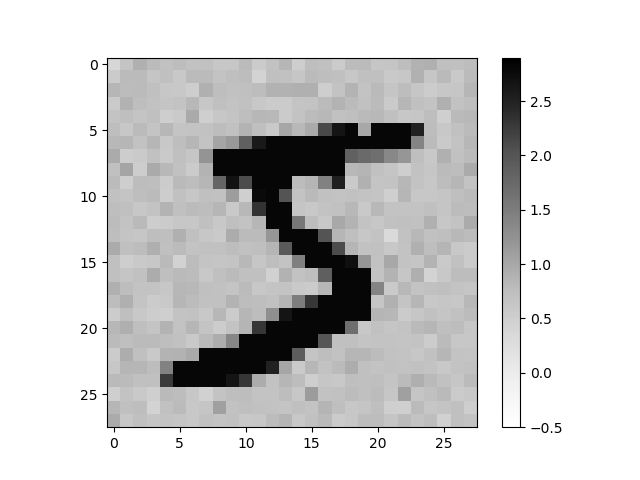

In [38]:
# show an example
plt.imshow(x5, vmax=2.9, vmin=-0.5, cmap=plt.cm.get_cmap('Greys'))
plt.colorbar()
plt.show()

In [39]:
np.linalg.norm(x1.numpy().flatten()-x5.flatten(), ord=2)

30.345156

/home/apps/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


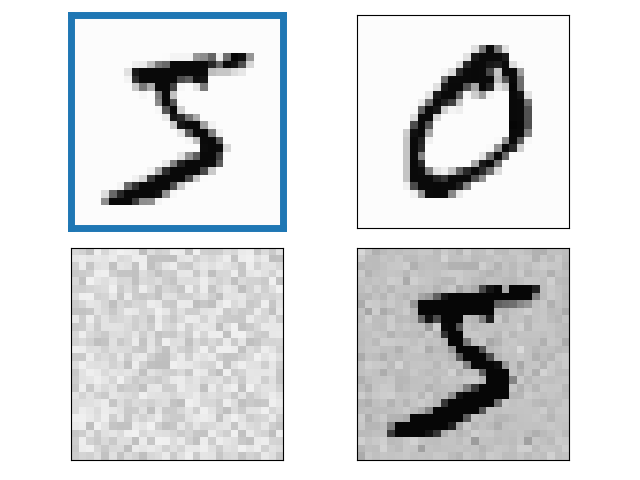

In [57]:
fig=plt.figure()
columns = 2
rows = 2

# ax enables access to manipulate each of subplots
ax = []

images = [x1,x2,x4,x5]

for i in range(columns*rows):
    ax.append( fig.add_subplot(rows, columns, i+1) )
    plt.imshow(images[i], vmax=2.9, vmin=-0.5, cmap=plt.cm.get_cmap('Greys'))
    
    if i==0:
        ax[i].spines['bottom'].set_color('tab:blue')
        ax[i].spines['top'].set_color('tab:blue')
        ax[i].spines['left'].set_color('tab:blue')
        ax[i].spines['right'].set_color('tab:blue') 
        ax[i].spines['bottom'].set_linewidth(5)
        ax[i].spines['top'].set_linewidth(5)
        ax[i].spines['left'].set_linewidth(5)
        ax[i].spines['right'].set_linewidth(5)
    ax[i].tick_params(axis='both', which='both',
                          labelbottom='off', labelleft='off', bottom='off', left='off')
    ax[i].xaxis.set_visible(False)
    ax[i].yaxis.set_visible(False)    
plt.tight_layout()

plt.show()